# Input Data

In [1]:
set.seed(64)

In [2]:
countNA <- function(x=NULL,cutOff=NULL){
  output<-FALSE
  perc<-sum(is.na(x))*100/length(x)
  if(perc>cutOff){output<-TRUE}
  output  
}

In [3]:
# path <- "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/GideHugoRiazAmatoLiu_AntiPD1_train.rds"
# train_pos <- readRDS("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/GideHugoRiazAmatoLiu_AntiPD1_train_pos.rds")
library("limma")
library("edgeR")
library("caret")


data <- readRDS("/home/jp/ICP_Responders/DataCollectionFormatting/MergeTables/GideHugoRiaz_AntiPD1_train.rds")
nrow(data)

# data already clean
# row_nas <- apply(data,1,function(x){countNA(x, 50)})
# data <- data[-which(row_nas %in% TRUE),]


# expression matrix
rmc <- c("Patient", "OS", "OS.Event", "RECIST", "Age", "Gender", "Response", "Source")
exp <- data[, -which(colnames(data) %in% rmc)]
exp <- t(exp)
# phenotype
sc <- c("Response", "Source")
ph <- data[, which(colnames(data) %in% sc)]
ph$src <- gsub("(.).*", "\\1", ph$Source)
ph$clr <- "green"
ph[ph$src == "R",]$clr <- "red" 
ph[ph$src == "H",]$clr <- "blue"
# ph[ph$src == "A",]$clr <- "purple"
# ph[ph$src == "L",]$clr <- "black"


ph$clr_res <- "green"
ph[ph$Response == 0,]$clr_res <- "gray"

Loading required package: lattice

Loading required package: ggplot2



[1] 74

# Filter lowly expressed genes
Not Used

In [4]:
# # select genes with an expression above threshold x in p% of samples
# nsmp <- ncol(exp)
# x <- 1  # 2 counts per million = log2 = 1
# n <- 5  # minimum 5 samples
# ridx <- rowSums(exp>x) > n
# table(ridx)
# expf <- exp[ridx, ]
# dim(expf)

# Look for batch effects

In [5]:
# trainTransformed <- predict(preProcess(exp, methods=c("center", "scale")), exp)

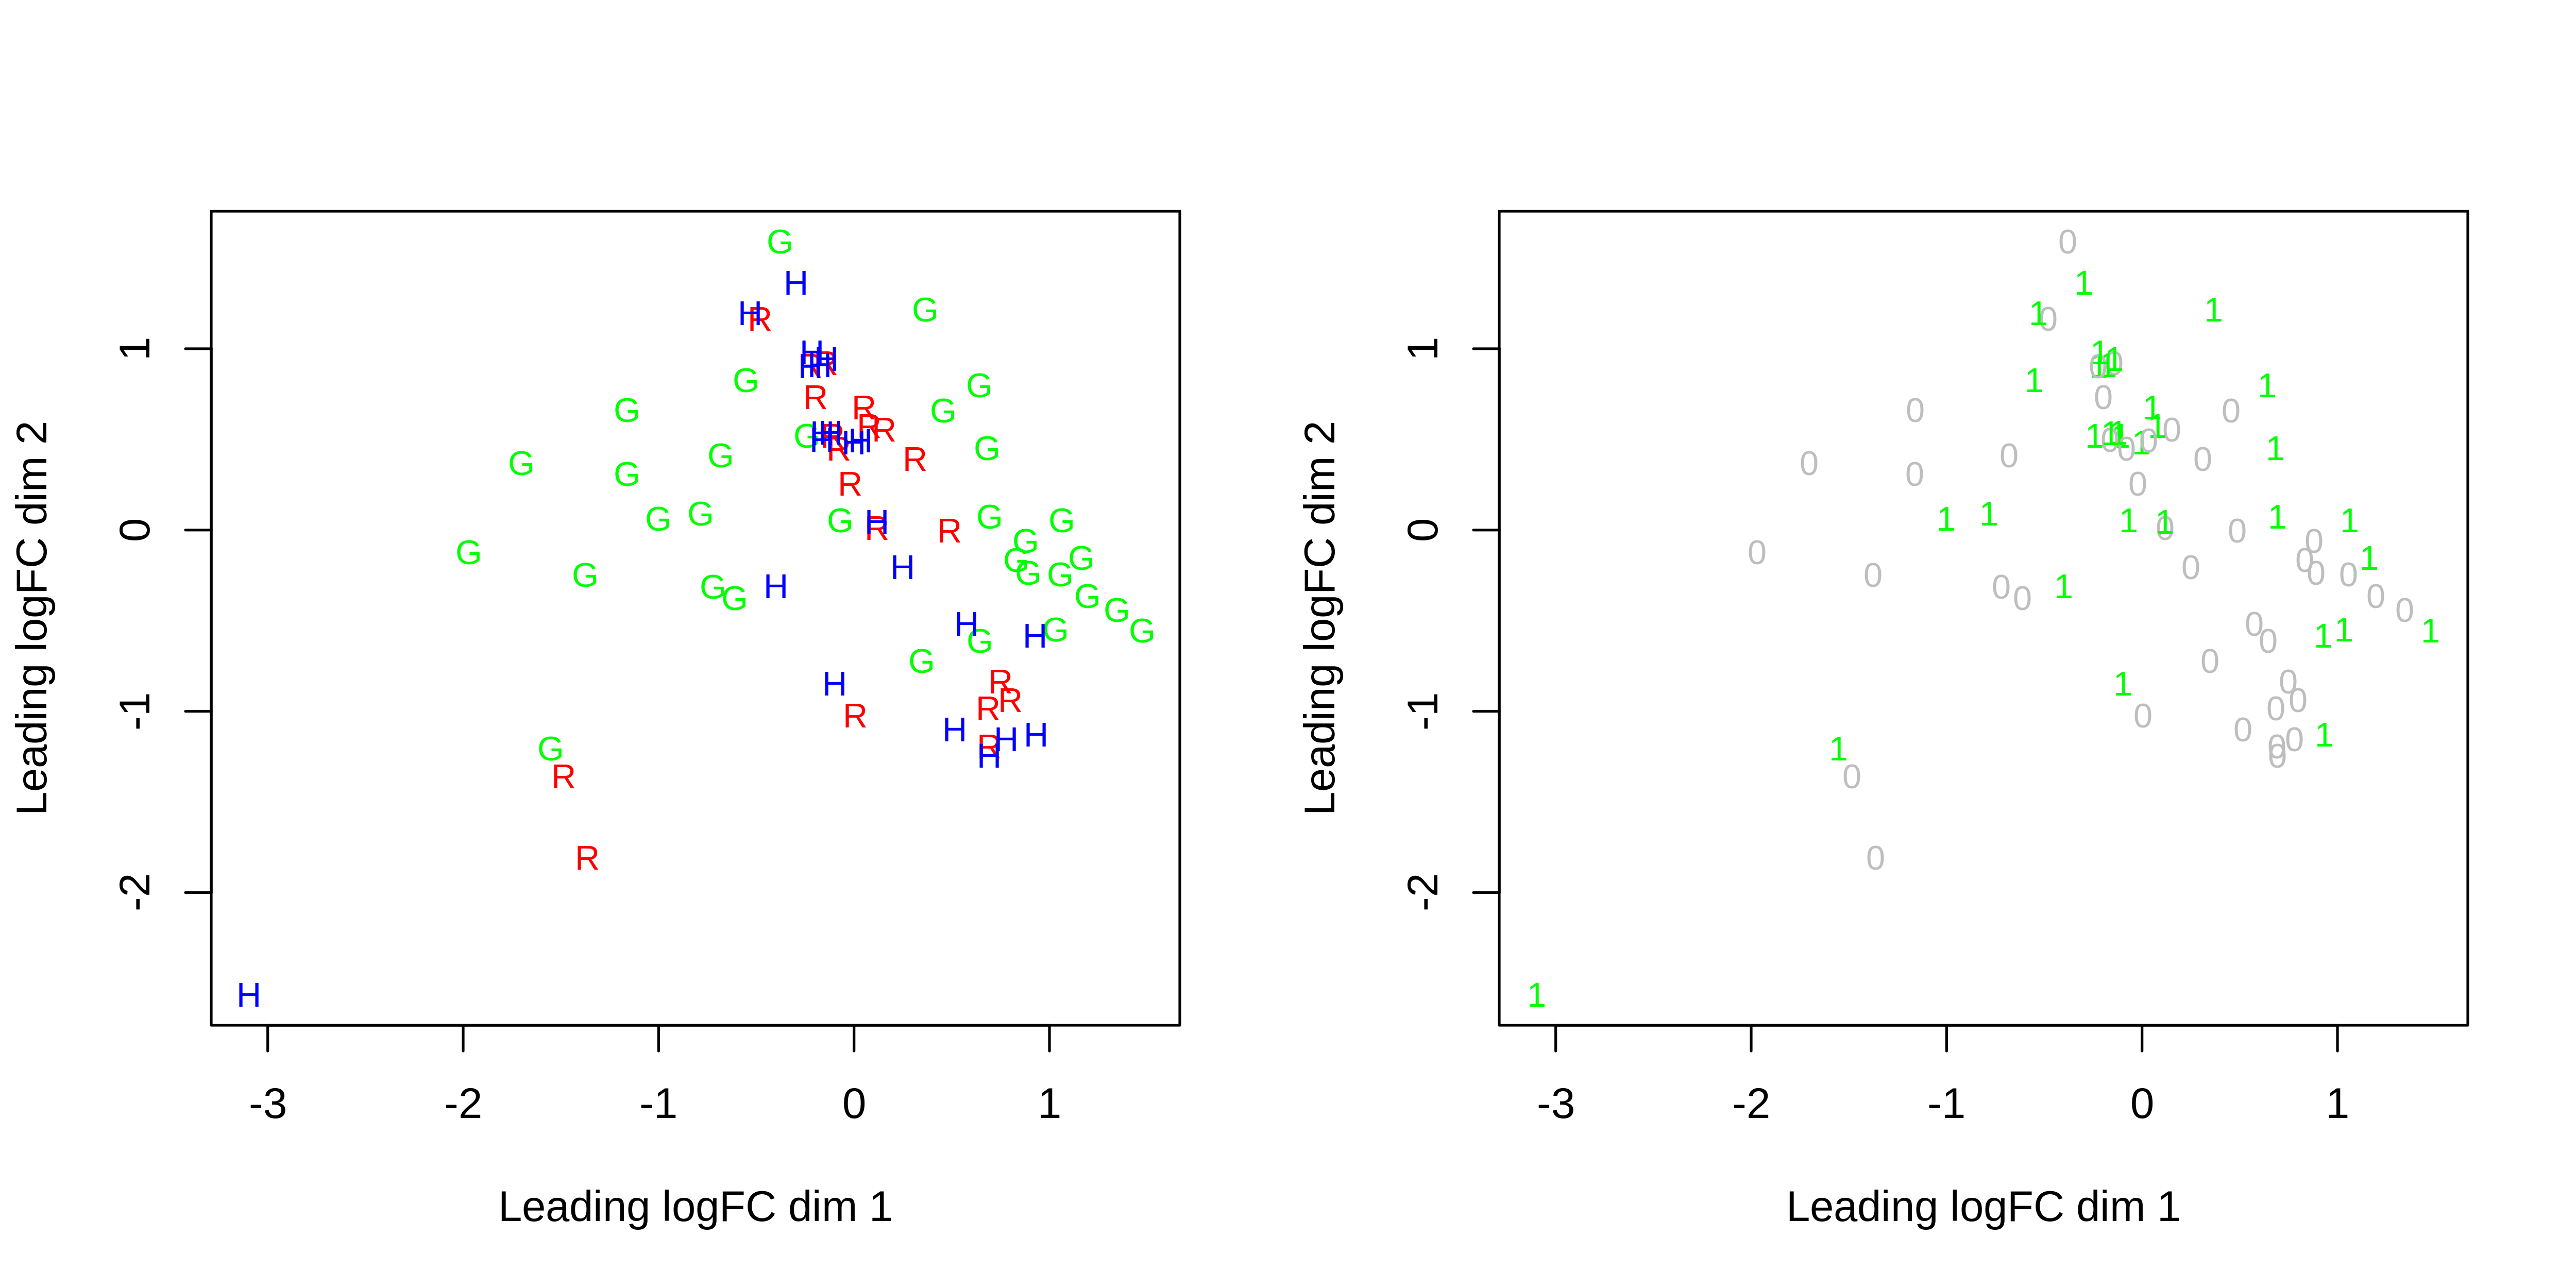

In [16]:
# dge_list <- DGEList(counts=exp, group=as.factor(ph$Source))
options(repr.plot.height=5, repr.plot.width=10, repr.plot.res=500)
par(mfrow=c(1,2))
plotMDS(exp, labels=ph$src, pch=19, col=ph$clr, cex=0.8)
plotMDS(exp, labels=as.character(ph$Response), pch=19, col=ph$clr_res, cex=0.8)

# Differential Expression

`TODO:`
STICK TO EBAYES<br>
Use treat/eBayes(0 Response Source as factors)?<br>
Best way to implement design matrix<br>
Rank on P values<br>
Take top 150/500<br>

In [7]:
#eBayes/ treat
# bayes <- eBayes(lin_mod)
# output <- topTable(lin_mod, number=Inf)
design <- model.matrix(~0+as.factor(ph$Response)+as.factor(ph$Source))
lin_mod <- lmFit(exp,design)
lin_mod <- eBayes(lin_mod)
output <- topTable(lin_mod, number=Inf)
ordered_output <- output[order(output$P.Value),]
# ordered_output
nrow(ordered_output[ordered_output$P.Value < 0.05, ])
# ordered_output[ordered_output$P.Value < 0.05, ]

[1] 86

# Output DiffEx Genes

In [8]:
limma86 <- rownames(ordered_output[ordered_output$P.Value < 0.05, ])
saveRDS(limma86, 
        "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/limma86.list.rds")

In [9]:
length(limma86)

[1] 86

In [10]:
ordered_output[ordered_output$P.Value < 0.05, ]

,as.factor.ph.Response.0,as.factor.ph.Response.1,as.factor.ph.Source.HugoAntiPD1,as.factor.ph.Source.RiazAntiPD1,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
654463,0.013247086,-0.011954256,-3.748314e-02,-0.1749038862,-0.056065747,5.195576,0.000962727,0.9999733
5588,-0.272385695,0.466269420,-2.063480e-01,-0.0203830915,-0.019822916,4.279633,0.003608911,0.9999733
338645,0.060085741,-0.077345490,-1.632593e-01,-0.0387009781,-0.058340244,4.236051,0.003845696,0.9999733
100128054,-0.009389928,-0.009618934,5.784833e-02,-0.3564202147,-0.088620592,4.233127,0.003862132,0.9999733
64699,-0.200043297,0.315268541,-1.148596e-01,0.0796903221,0.010184729,4.211579,0.003985493,0.9999733
6610,-0.397444128,0.318200595,-3.494917e-02,0.3383428472,-0.006922420,3.867306,0.006597625,0.9999733
157807,-0.172281697,-0.171246648,1.754663e-01,0.2274338069,-0.058199846,3.854183,0.006726015,0.9999733
8611,0.241047157,-0.246177134,7.439524e-02,-0.4737365373,-0.075563827,3.694876,0.008501516,0.9999733
3134,-0.442676339,0.589384283,-2.964508e-01,0.1191649297,-0.052307152,3.597737,0.009809432,0.9999733


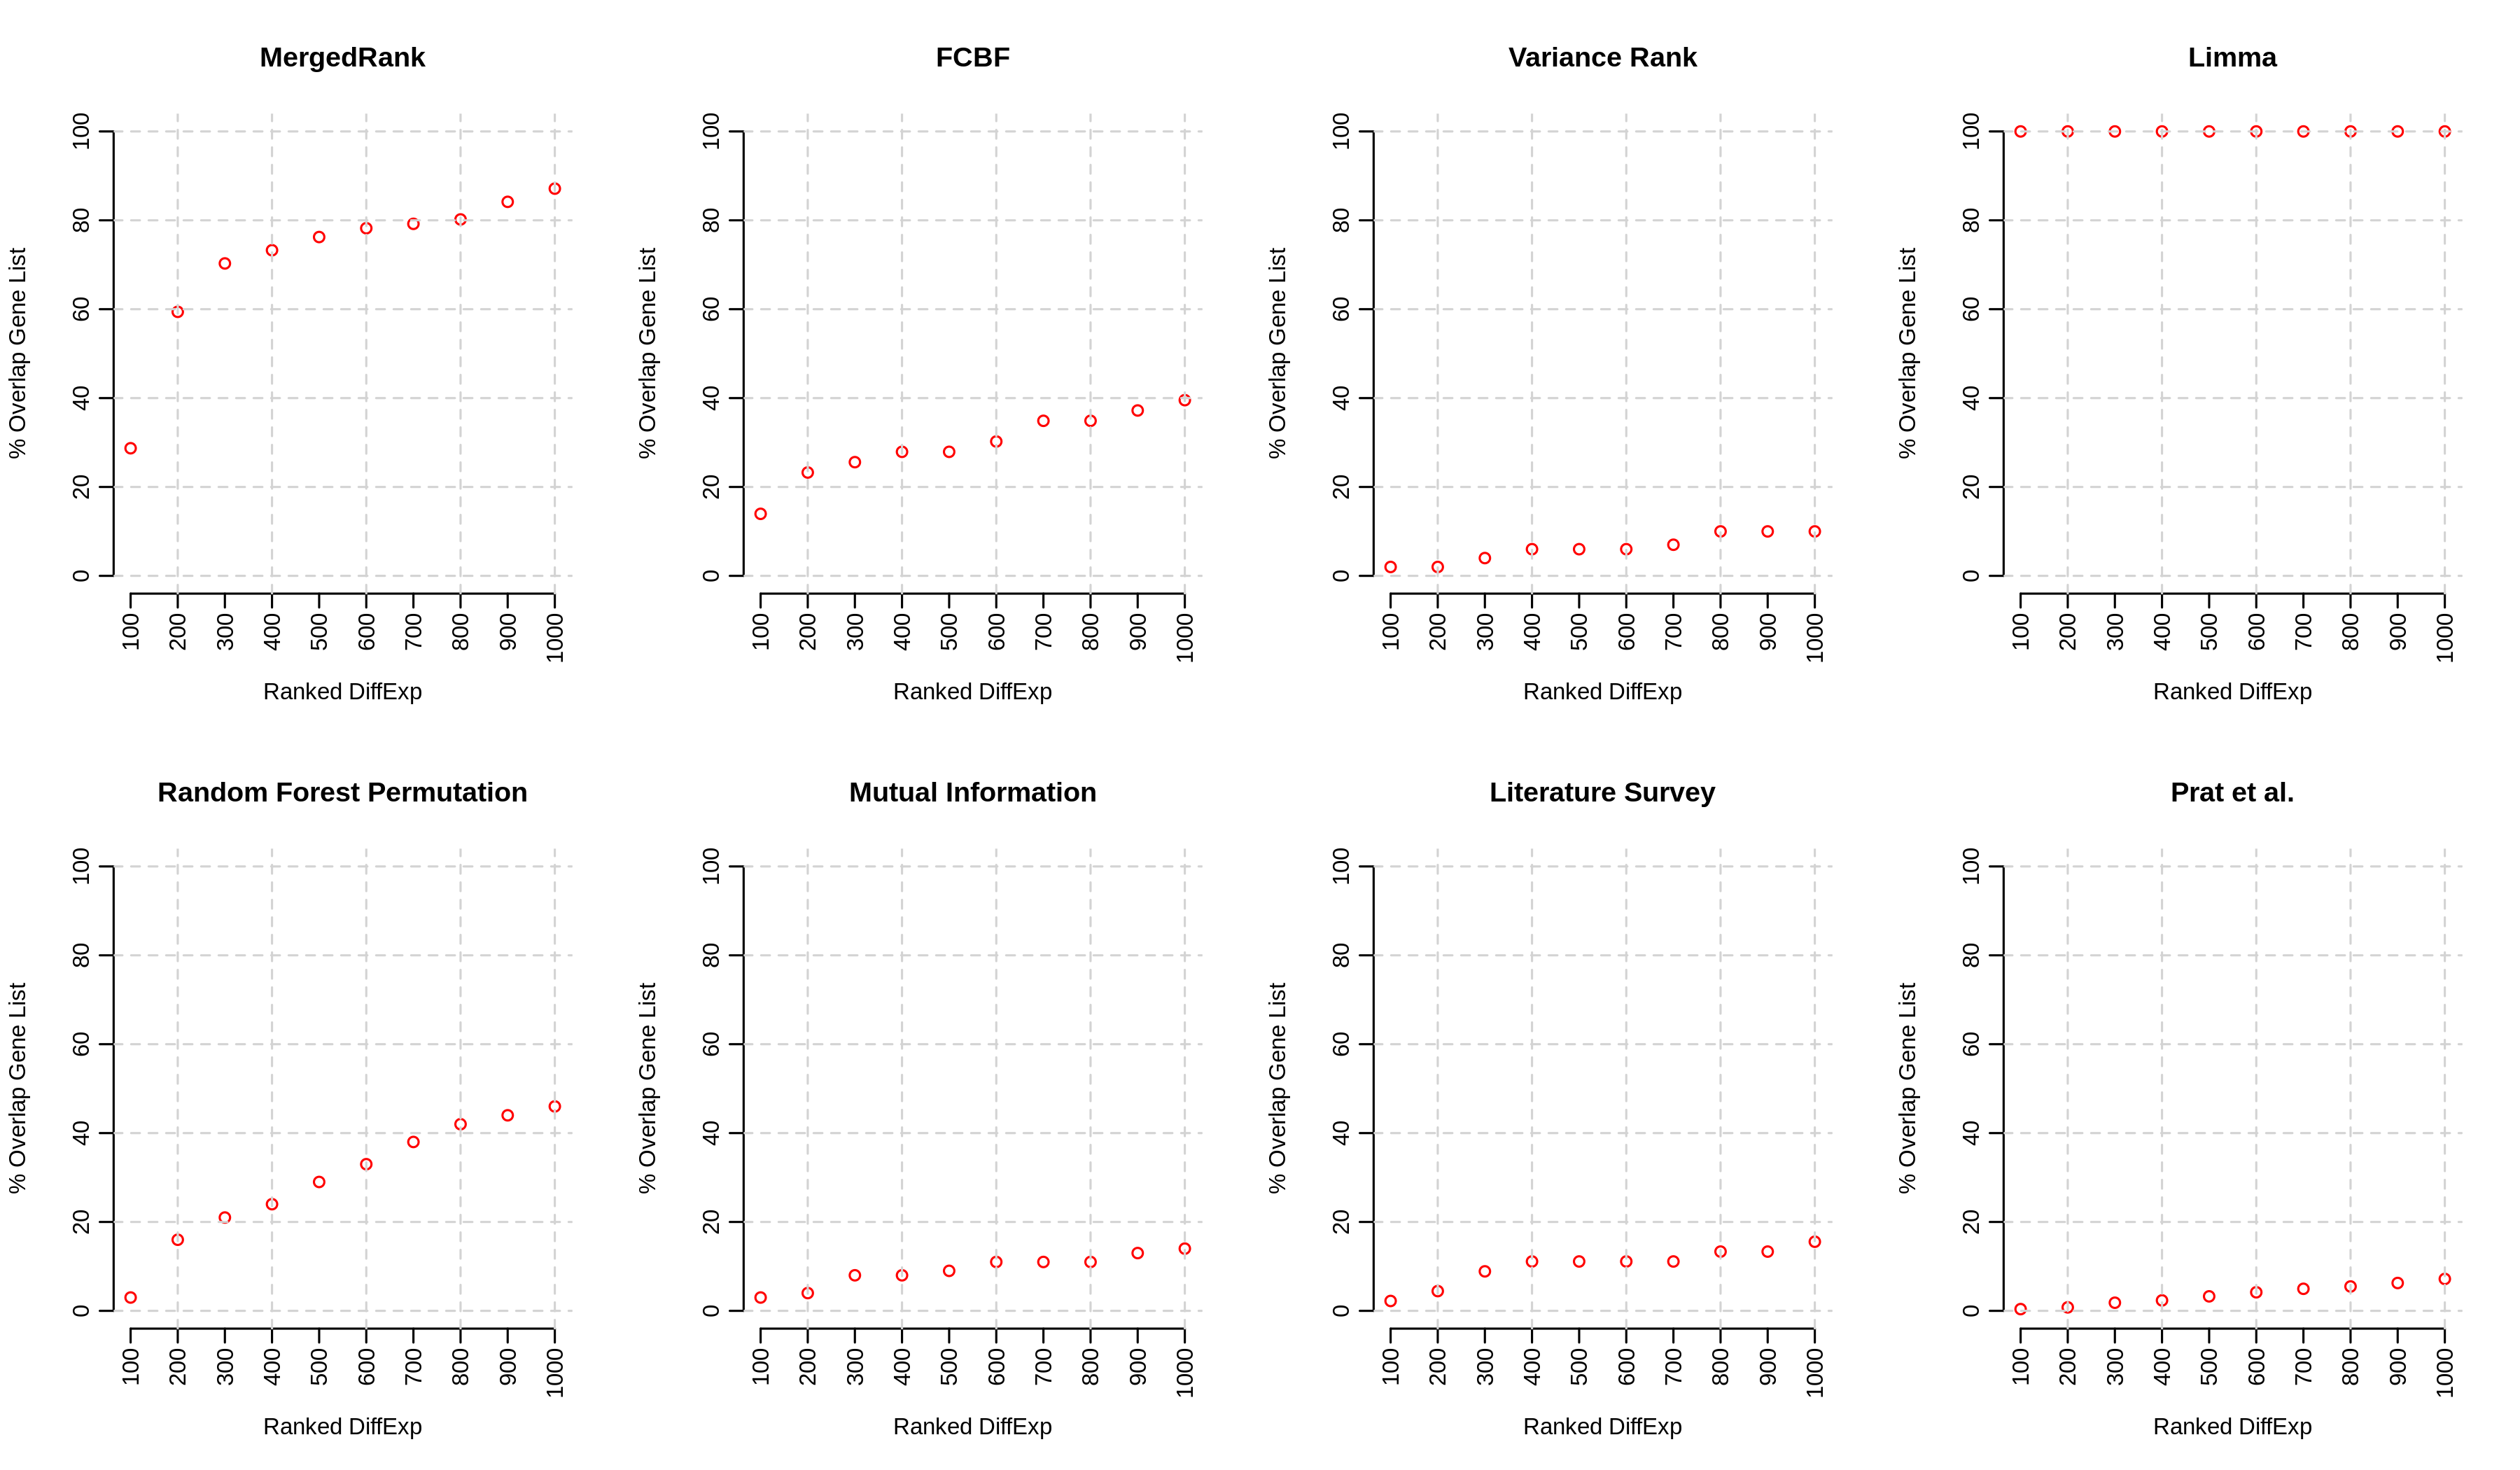

In [17]:
cmn_path <- "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/"
ord.gl <- rownames(ordered_output)

plot_list <- function(pathRDS = NULL, group = NULL){
                    fbcf.gl <- readRDS(pathRDS)


                    perc.fbcf.gl <- c(length(which(fbcf.gl %in% ord.gl[1:100])),
                                     length(which(fbcf.gl %in% ord.gl[1:200])),
                                     length(which(fbcf.gl %in% ord.gl[1:300])),
                                     length(which(fbcf.gl %in% ord.gl[1:400])),
                                     length(which(fbcf.gl %in% ord.gl[1:500])),
                                     length(which(fbcf.gl %in% ord.gl[1:600])),
                                     length(which(fbcf.gl %in% ord.gl[1:700])),
                                     length(which(fbcf.gl %in% ord.gl[1:800])),
                                     length(which(fbcf.gl %in% ord.gl[1:900])),
                                     length(which(fbcf.gl %in% ord.gl[1:1000]))
                                     )*100/length(fbcf.gl)


                    plot(perc.fbcf.gl, col="red", main=group,
                         axes = FALSE,
                         xlab= "Ranked DiffExp", 
                         ylab = "% Overlap Gene List",
                         ylim=c(0,100))
                    axis(1, at=1:10, labels=c("100","200", "300", "400", "500","600",
                                                           "700", "800", "900","1000"),
                        las=2) 
                    axis(2, at=c(0, 20, 40, 60, 80, 100), labels=c(0, 20, 40, 60, 80, 100))
                    grid(lty="dashed")
                    }

options(repr.plot.height=7, repr.plot.width=12, repr.plot.res=300)
par(mfrow=c(2, 4), mgp=c(3, 0.7, 0))
plot_list(paste0(cmn_path, "ml.list.rds"), "MergedRank")
plot_list(paste0(cmn_path, "fcbf44.list.rds"), "FCBF")
plot_list(paste0(cmn_path, "top100var.list.rds"), "Variance Rank")
plot_list(paste0(cmn_path, "limma86.list.rds"), "Limma")
plot_list(paste0(cmn_path, "ranger.imp100.rds"), "Random Forest Permutation")
plot_list(paste0(cmn_path, "jmim.list.rds"), "Mutual Information")
plot_list(paste0(cmn_path, "litsur.list.rds"), "Literature Survey")
plot_list(paste0(cmn_path, "prat.list.rds"), "Prat et al.")

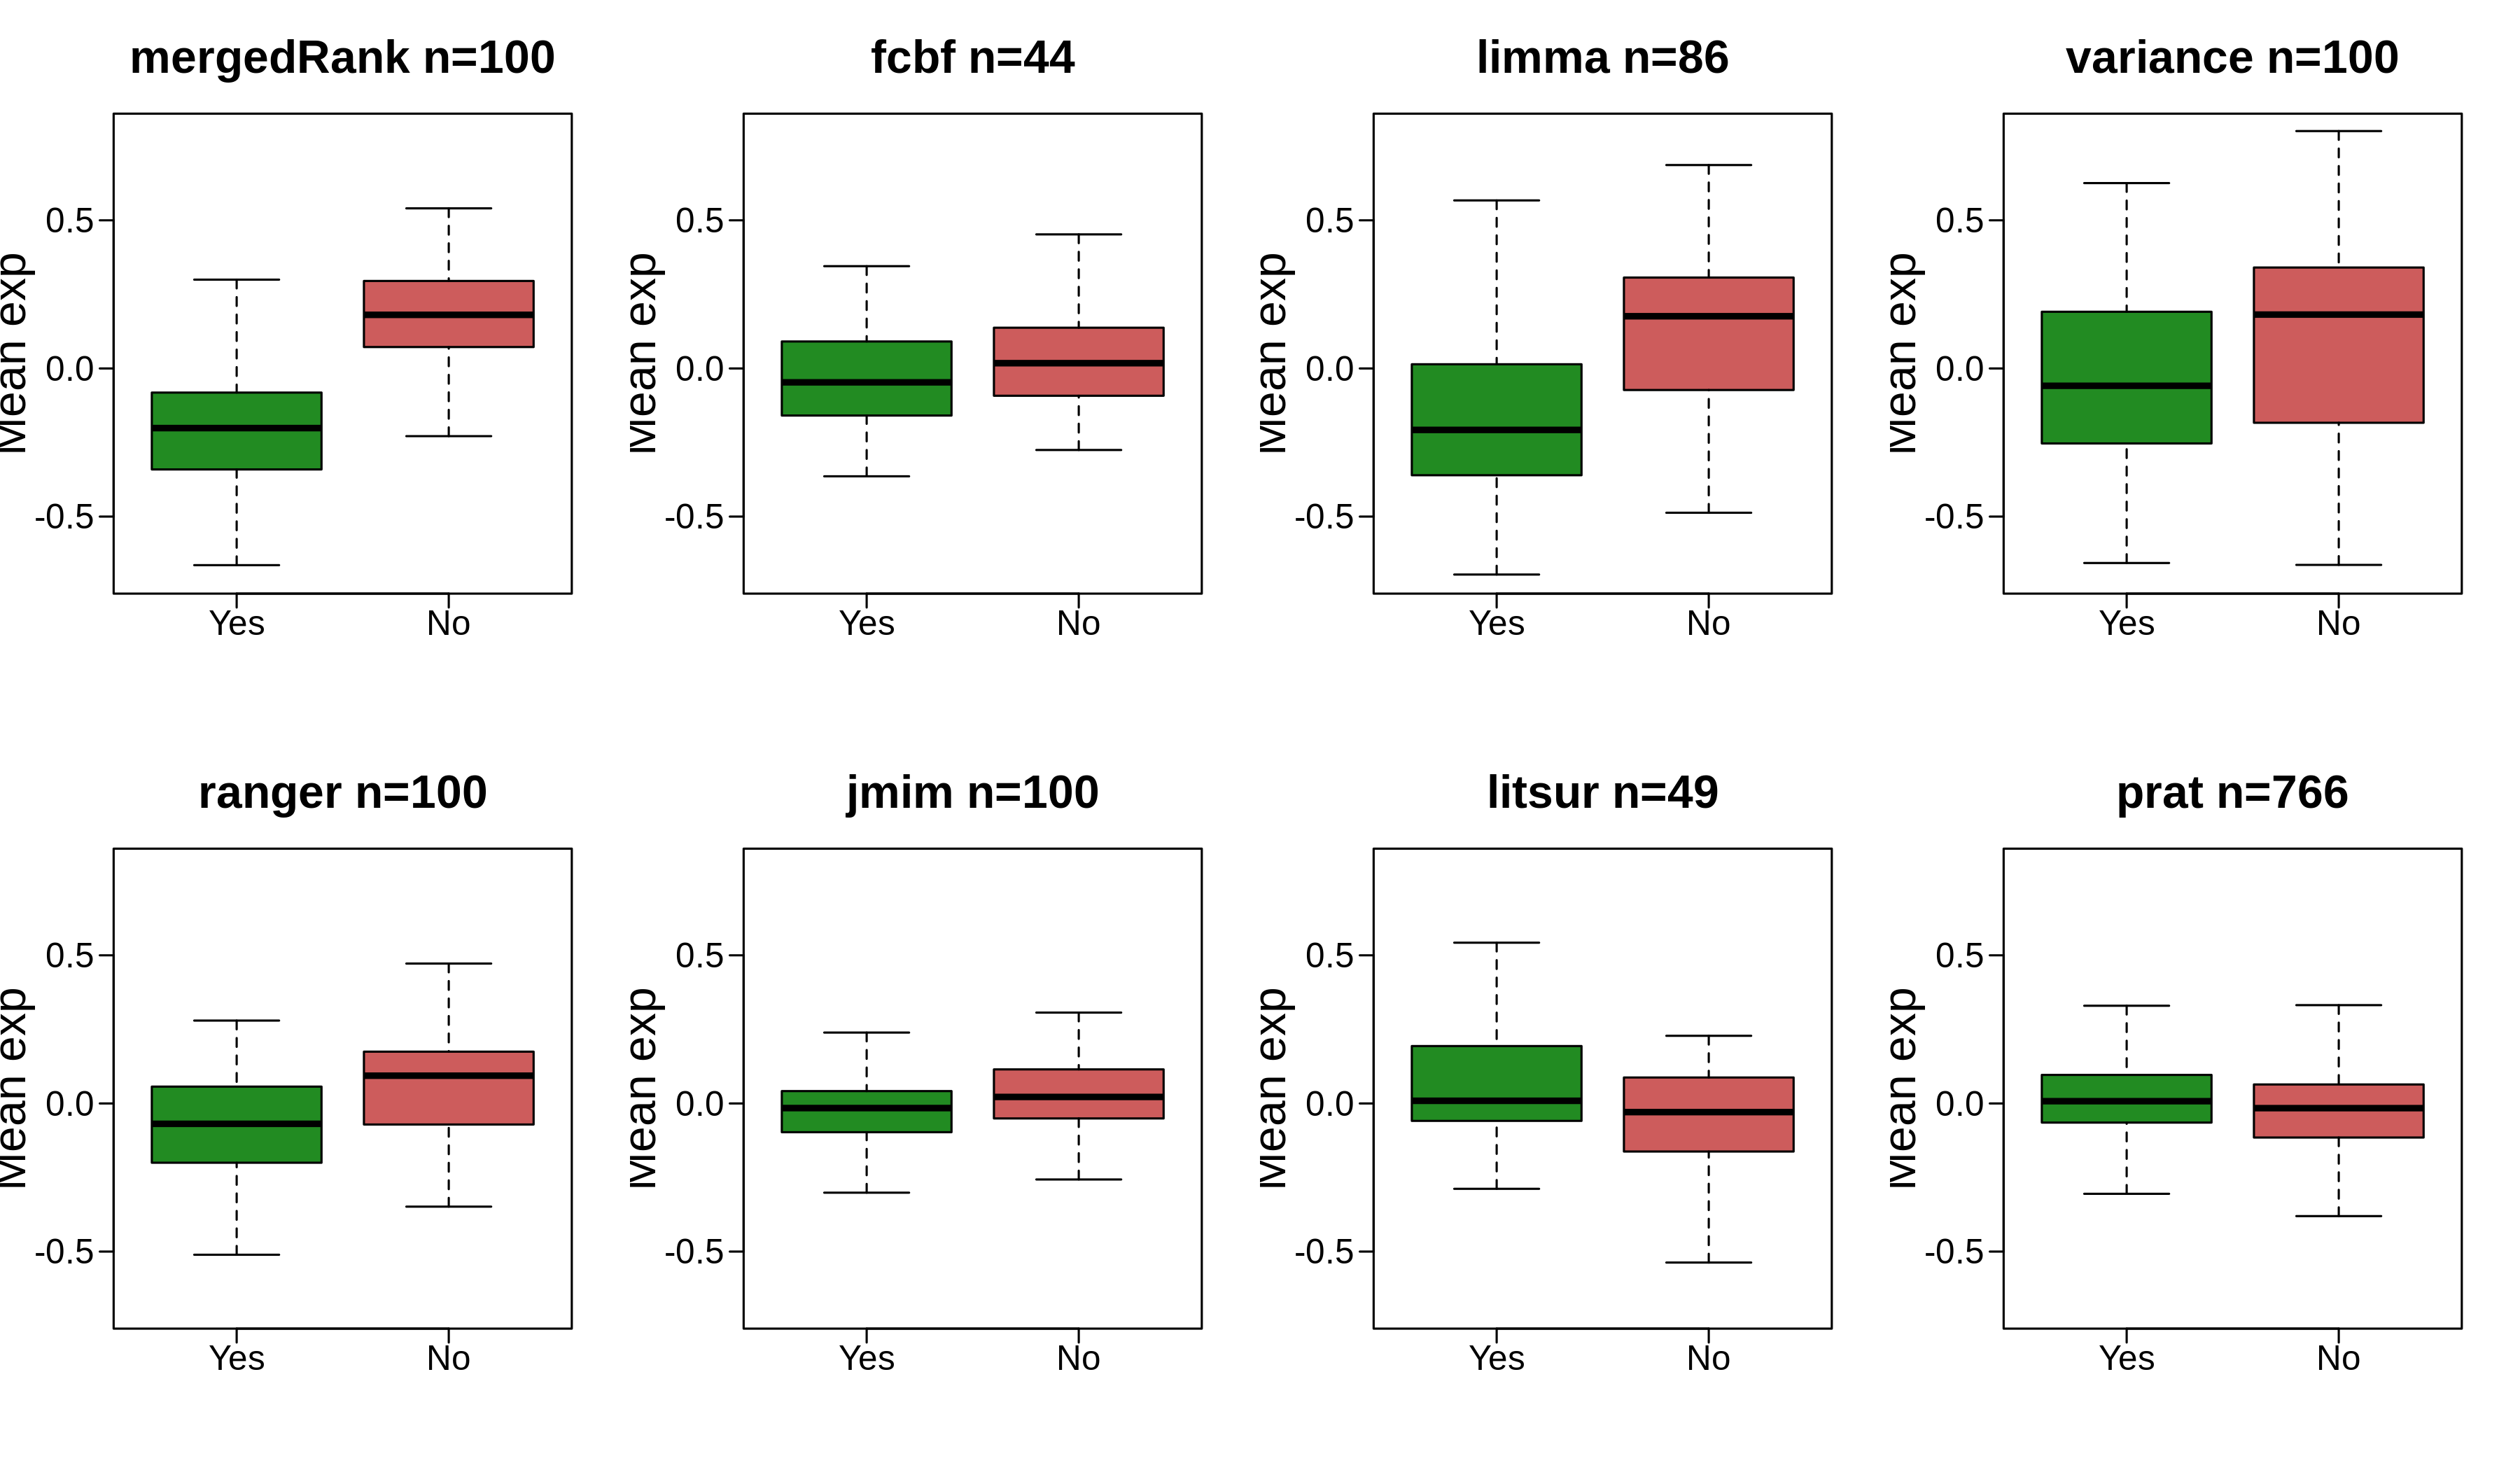

In [61]:
e <- as.data.frame(exp)
p <- ph$Response

plotExp <- function(path, label) {
                        l <- readRDS(path)

                        e <- e[which(rownames(e) %in% l),]
                        # dim(e)
                        # head(e)
                        # length(unique(l))
                        mY <- e[, which(p %in% "1")]
                        mN <- e[, which(p %in% "0")]
                        # dim(mY)
                        # dim(mN)
                        mY <- apply(mY, 1, function(x){mean(x)})
                        # mY
                        mN <- apply(mN, 1, function(x){mean(x)})
                        # mN
                        boxplot(mY, mN, names = c("Yes", "No"), ylab="Mean exp", outline=FALSE, 
                                    col = c("forestgreen", "indianred"), main=label, ylim = c(-0.7, 0.8),
                               cex.lab=2, cex.axis=1.5, cex.main=2, las=1)
                    }

options(repr.plot.height=7, repr.plot.width=12, repr.plot.res=300)
par(mfrow=c(2, 4), mgp=c(3, 0.7, 0))

plotExp("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/ml.list.rds", "mergedRank n=100")
plotExp("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/fcbf44.list.rds", "fcbf n=44")
plotExp("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/limma86.list.rds", "limma n=86")
plotExp("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/top100var.list.rds", "variance n=100")
plotExp("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/ranger.imp100.rds", "ranger n=100")
plotExp("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/jmim.list.rds", "jmim n=100")
plotExp("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/litsur.list.rds", "litsur n=49")
plotExp("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/prat.list.rds", "prat n=766")

